<center><font face='Georgia'> 

# Traitement d'images. 

    
<center><font size=5 color ='grey' > <i><b>Compte Rendu TP2<b></i> : Opérations ponctuelles et transformations géométriques  </center></font>
                 
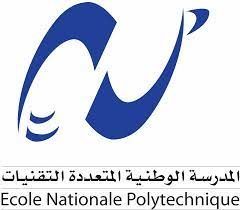


------



> **Fait par :**
<font color ='darkblue' face='Georgia' >    
 1.OUCHENE Souhil.  
 2.TOUATI Islem.
</font>
    
> **Janvier 2023**
    



### Importation des packages :

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cmath
import os
import cv2 as cv
from PIL import Image
import seaborn as sns
import math
import argparse
import imutils


## Manip1 :

### Lecture et affichage de l'image :

In [2]:
image = Image.open('flower.bmp')
sns.reset_orig()
plt.show()

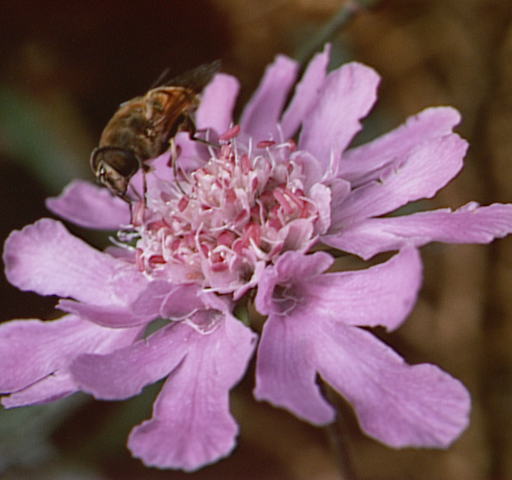

### Conversion en niveau de gris :

In [3]:
imageGray = image.convert('L')
imageGray.save('Flower_gray.bmp')

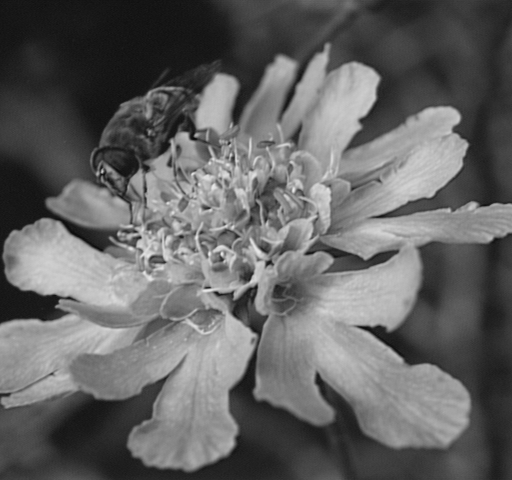


### Calcul et affichage de l'histogramme, l'histogramme normalise:

Pour l'histogramme :

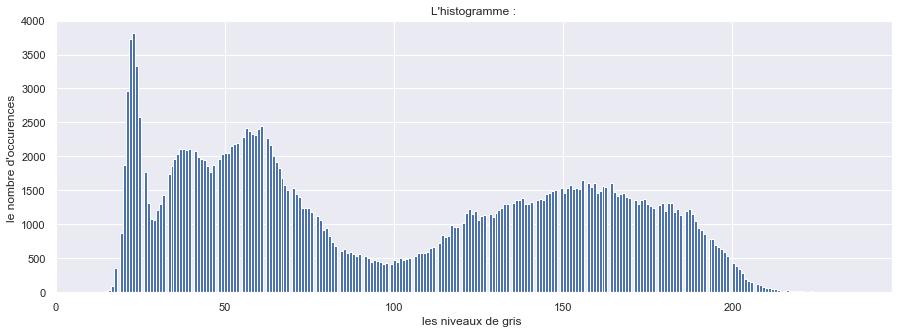

In [4]:
numpydata = np.asarray(imageGray)
H = []
for i in range(len(numpydata)):
        for j in range(len(numpydata[i])):
                H.append(numpydata[i][j])
figure = plt.figure(figsize=(15, 5))
sns.set()
plt.hist(x=H, bins = 256)
plt.title("L'histogramme :")
plt.xlabel("les niveaux de gris ")
plt.ylabel("le nombre d'occurences ")
plt.show()

Le calcul du nombre d'occurrence va nous donner l'histogramme comme suit (on a utiliser le cv.calcHist) :

In [5]:
hist = cv.calcHist([numpydata], [0],None,[256],[0,256])
hist

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [2.000e+00],
       [3.000e+00],
       [7.000e+00],
       [7.000e+00],
       [1.400e+01],
       [3.800e+01],
       [9.400e+01],
       [3.550e+02],
       [8.740e+02],
       [1.869e+03],
       [2.970e+03],
       [3.727e+03],
       [3.810e+03],
       [3.329e+03],
       [2.578e+03],
       [1.778e+03],
       [1.319e+03],
       [1.077e+03],
       [1.067e+03],
       [1.216e+03],
       [1.303e+03],
       [1.433e+03],
       [1.746e+03],
       [1.852e+03],
       [1.967e+03],
       [2.038e+03],
       [2.108e+03],
       [2.106e+03],
       [2.089e+03],
       [2.111e+03],
       [2.081e+03],
       [1.991e+03],
       [1.968e+03],
       [1.942e+03],
       [1.858e+03],
       [1.778e+03],
       [1.878e+03],
       [1.966e+03],
       [2.031e+03],


Pour l'histogramme normalise :
il suffit de rajouter l'argument "density = True" qui va donner une densite de probabilite : 

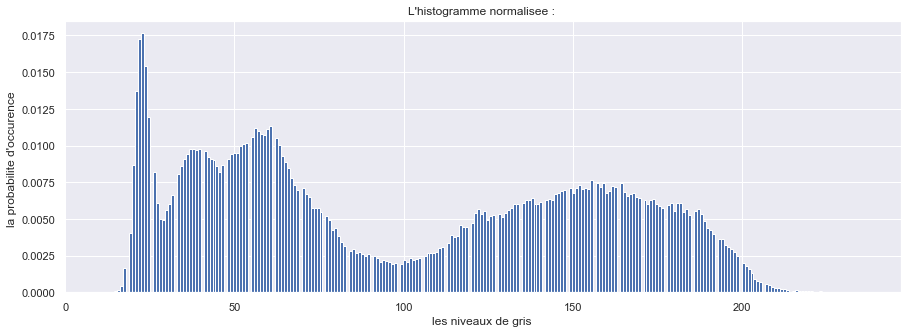

In [6]:
figure = plt.figure(figsize=(15, 5))
plt.hist(x=H, bins = 256, density = True)
plt.title("L'histogramme normalisee : ")
plt.xlabel("les niveaux de gris ")
plt.ylabel("la probabilite d'occurence ")
plt.show()

Le calcul de la probabilite d'occurrence va nous donner l'histogramme normalise comme suit (on a utiliser le cv.calcHist avec division sur le nombre total de pixel : dimension a partir du size) :

In [7]:
histNorm = cv.calcHist([numpydata], [0],None,[256],[0,256]) / (numpydata.shape[0] * numpydata.shape[1])
histNorm

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.13802083e-06],
       [1.22070313e-05],
       [2.84830729e-05],
       [2.84830729e-05],
       [5.69661458e-05],
       [1.54622396e-04],
       [3.82486979e-04],
       [1.44449870e-03],
       [3.55631510e-03],
       [7.60498047e-03],
       [1.20849609e-02],
       [1.51652018e-02],
       [1.55029297e-02],
       [1.35457357e-02],
       [1.04899089e-02],
       [7.23470052e-03],
       [5.36702474e-03],
       [4.38232422e-03],
       [4.34163411e-03],
       [4.94791667e-03],
       [5.30192057e-03],
       [5.83089193e-03],
       [7.10449219e-03],
       [7.53580729e-03],
       [8.00374349e-03],
       [8.29264323e-03],
       [8.57747396e-03],
       [8.56933594e-03],
       [8.50016276e-03],


### Commentaires :

-On peut dire que l'histogramme normalise represente la fonction de densite de probabilite des niveaux de gris de l'image égale au (nombre d’occurrences / la dimension) qui est inférieure à 1.

-Nous remarquons aussi que les deux histogrammes ont la même forme ou l'axe de abcisses represente les differents niveaux de gris de 0 a 255 et pour l’axe des ordonnées, nous avons les variations du nombre d’occurrences de niveau de gris pour l’histogramme de l’image.


### Calcul et affichage de l'histogramme cumule :

il suffit de rajouter l'argument "density = True" qui va donner une densite de probabilite et aussi l'argument "cumulative = True" ce qui va donner :

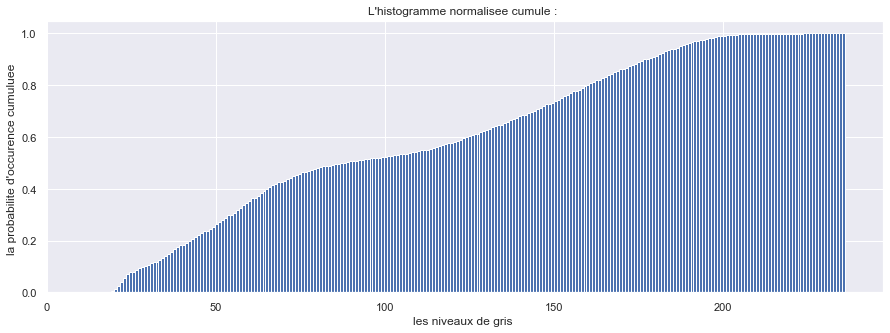

In [8]:
figure = plt.figure(figsize=(15, 5))
hcn = plt.hist(x=H, bins = 256, cumulative = True, density = True)
plt.title("L'histogramme normalisee cumule : ")
plt.xlabel("les niveaux de gris ")
plt.ylabel("la probabilite d'occurence cumuluee ")
plt.show()

Pour avoir les valeurs numeriques de l'histogramme normalise cumule, on utilise la fonction "np.cumsum"

In [9]:
histNormCum = np.cumsum(histNorm)
histNormCum

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.13802083e-06,
       2.03450521e-05, 4.88281250e-05, 7.73111979e-05, 1.34277344e-04,
       2.88899740e-04, 6.71386719e-04, 2.11588542e-03, 5.67220052e-03,
       1.32771810e-02, 2.53621419e-02, 4.05273438e-02, 5.60302734e-02,
       6.95760091e-02, 8.00659180e-02, 8.73006185e-02, 9.26676432e-02,
       9.70499674e-02, 1.01391602e-01, 1.06339518e-01, 1.11641439e-01,
       1.17472331e-01, 1.24576823e-01, 1.32112630e-01, 1.40116374e-01,
       1.48409017e-01, 1.56986491e-01, 1.65555827e-01, 1.74055990e-01,
       1.82645671e-01, 1.91113281e-01, 1.99214681e-01, 2.07222493e-01,
       2.15124512e-01, 2.22684733e-01, 2.29919434e-01, 2.37561035e-01,
       2.45560710e-01, 2.53824870e-01, 2.62158203e-01, 2.70515951e-01,
       2.79256185e-01, 2.88122559e-01, 2.97082520e-01, 3.06388346e-01,
      

### Commentaire :

On peut voir l'histogramme normalise cumule comme une fonction de repartition, ou a chaque niveau de gris on somme les probabilite d'occurrence du NG actuel et les NG inferieur, Ce histogramme est caracterise par une fonction croissante bornee par 1.



Pour mieux afficher les valeurs de l'histogramme, histogramme normalise et histogramme normalisee cumule pour chaque NG on va construire le dictionnaire suivant :

In [10]:
# l'affichage sera de la forme : {NG : H;Hn;Hnc}
dict = {}
for i in range(256):
    dict[i] = np.asarray([hist[i], histNorm[i], histNormCum[i]]).astype("float")
dict

C:\Users\Computer House\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


{0: array([0., 0., 0.]),
 1: array([0., 0., 0.]),
 2: array([0., 0., 0.]),
 3: array([0., 0., 0.]),
 4: array([0., 0., 0.]),
 5: array([0., 0., 0.]),
 6: array([0., 0., 0.]),
 7: array([0., 0., 0.]),
 8: array([0., 0., 0.]),
 9: array([0., 0., 0.]),
 10: array([0., 0., 0.]),
 11: array([2.00000000e+00, 8.13802083e-06, 8.13802083e-06]),
 12: array([3.00000000e+00, 1.22070313e-05, 2.03450521e-05]),
 13: array([7.00000000e+00, 2.84830729e-05, 4.88281250e-05]),
 14: array([7.00000000e+00, 2.84830729e-05, 7.73111979e-05]),
 15: array([1.40000000e+01, 5.69661458e-05, 1.34277344e-04]),
 16: array([3.80000000e+01, 1.54622396e-04, 2.88899740e-04]),
 17: array([9.40000000e+01, 3.82486979e-04, 6.71386719e-04]),
 18: array([3.55000000e+02, 1.44449870e-03, 2.11588542e-03]),
 19: array([8.74000000e+02, 3.55631510e-03, 5.67220052e-03]),
 20: array([1.86900000e+03, 7.60498047e-03, 1.32771810e-02]),
 21: array([2.97000000e+03, 1.20849609e-02, 2.53621419e-02]),
 22: array([3.72700000e+03, 1.51652018e-02

### Egalisation de l'histogramme :
On va effectuer une egalisation de de manieres : 
- une ou on remplace chaque NG par celui apres l'utilisation de round(255 * Hnc(i;j))
- 2eme avec la fonction predefinie cv.equalizeHist()

In [11]:
Heg = np.zeros((numpydata.shape[0], numpydata.shape[1]))
for i in range(numpydata.shape[0]) :
    for j in range(numpydata.shape[1]):
        Heg[i][j] = np.round(255*histNormCum[numpydata[i][j]])

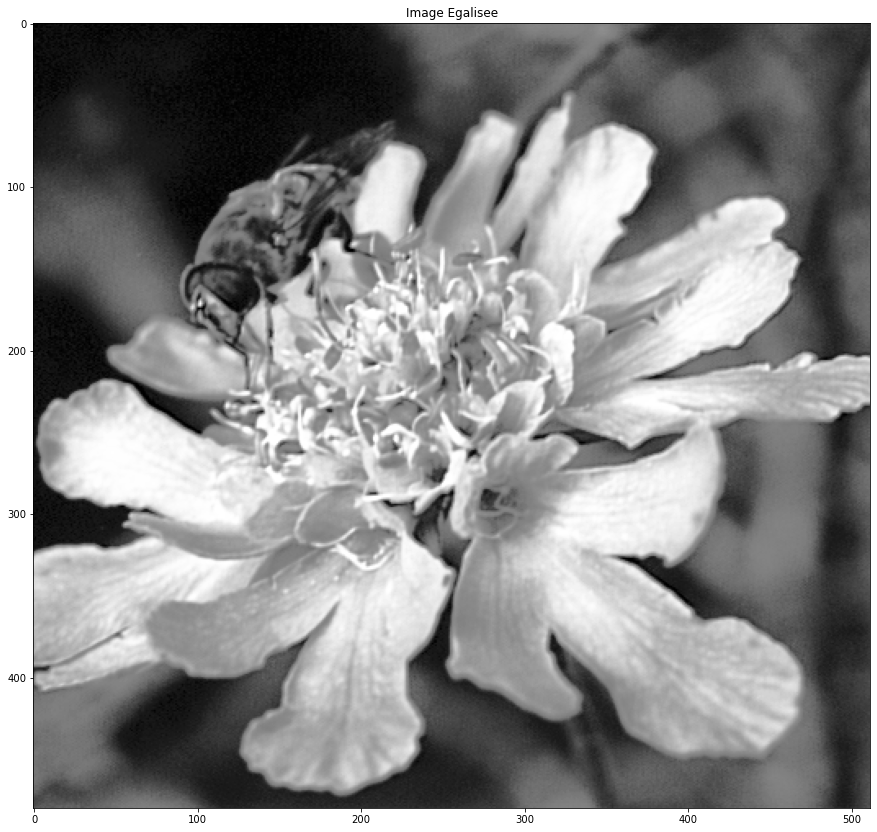

In [12]:
sns.reset_orig()
fig=plt.figure(figsize=(15, 15))
Heg_CV = np.uint8(Heg)
plt.title("Image Egalisee")
plt.imshow(Heg_CV, cmap = "gray")
plt.show()

Dans cette partie, on va les tracer comme plot(graphe lineair), puis on va comparer entre le graphe d'occurence de l'original avec celui de l'egalise:

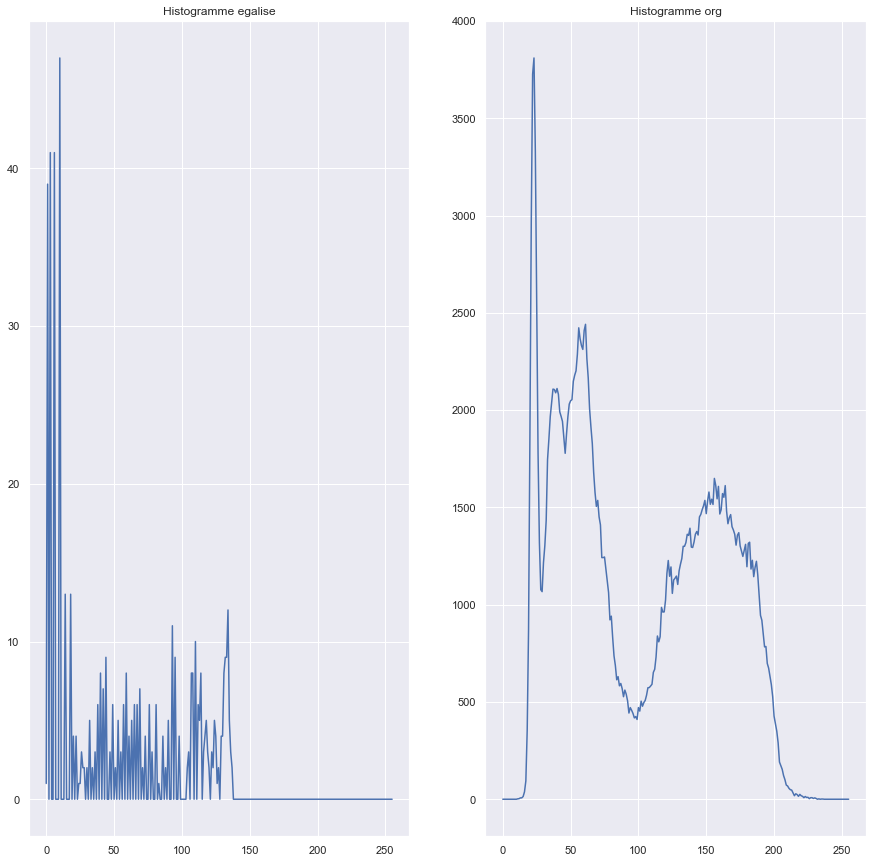

In [13]:
sns.set()
Hist_eg = cv.calcHist(Heg_CV, [0],None,[256],[0,256])
Hist_org = cv.calcHist([numpydata], [0],None,[256],[0,256])
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.plot(Hist_eg)
plt.title('Histogramme egalise')

fig.add_subplot(1,2,2)
plt.plot(Hist_org)
plt.title('Histogramme org')
plt.show()

Dans cette partie, on va utiliser des histogrammes :

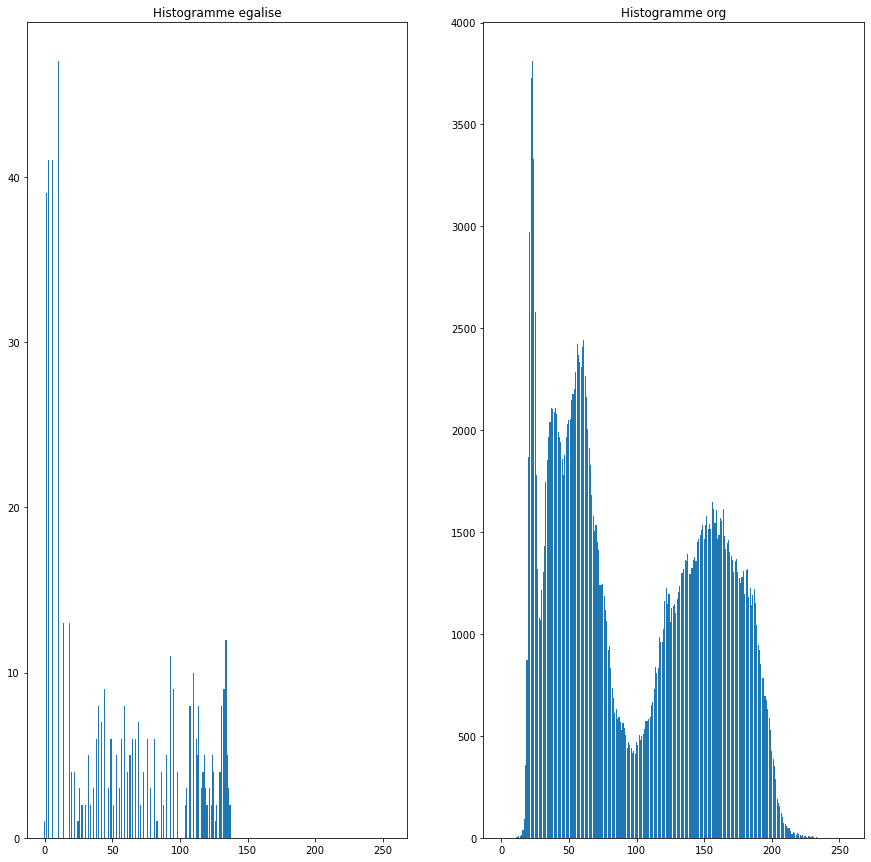

In [14]:
sns.reset_orig()
hist_dict_egalise = {}
hist_dict = {}
for i in range(len(Hist_eg)):
    hist_dict_egalise[i] = Hist_eg[i,0]
    hist_dict[i] = Hist_org[i,0]
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.bar(hist_dict_egalise.keys(), hist_dict_egalise.values())
plt.title('Histogramme egalise')

fig.add_subplot(1,2,2)
plt.bar(hist_dict.keys(), hist_dict.values())
plt.title('Histogramme org')
plt.show()


### Commentaires :

Cette premiere maniere de trouver l'histogramme egalise nous permet de dire qu'on a pu dilater l'histogramme, on a pu obtenir une forme plate un peu ce qui va resulter comme une amelioration du contraste de l'image(difference entre zones claires et sombres(des images en niveau de gris) est bien mise en evidence). On peut confirmer nos resultats avec un retour a une comparaison entre l'image originale en NG et l'image obtenue apres egalisation :



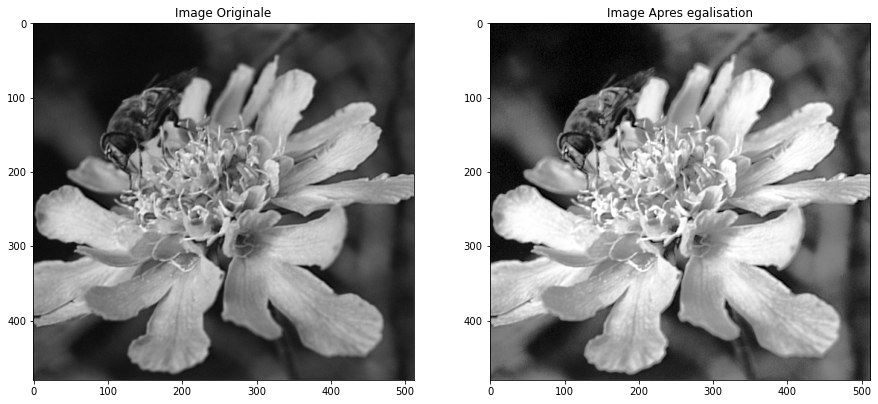

In [15]:
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.imshow(imageGray, cmap = "gray")
plt.title('Image Originale')

fig.add_subplot(1,2,2)
plt.imshow(Heg_CV, cmap = "gray")
plt.title('Image Apres egalisation')
plt.show()

### Utilisation de la fonction cv.EqualizeHist :

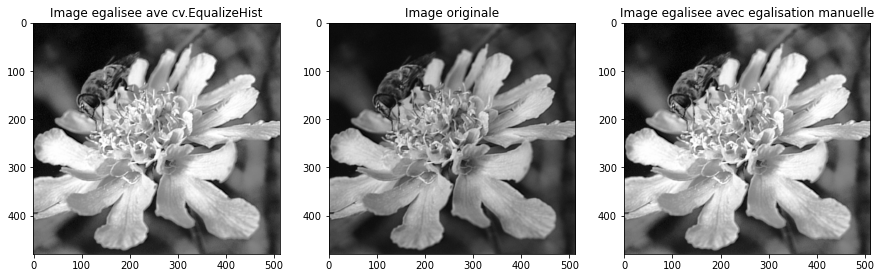

In [16]:
sns.reset_orig()
equ_img = cv.equalizeHist(numpydata)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,1)
plt.title("Image egalisee ave cv.EqualizeHist")
plt.imshow(equ_img, cmap = "gray")

fig.add_subplot(1,3,2)
plt.title("Image originale")
plt.imshow(numpydata, cmap = "gray")

fig.add_subplot(1,3,3)
plt.title("Image egalisee avec egalisation manuelle")
plt.imshow(Heg, cmap = "gray")
plt.show()

### Comparaison et commentaires :

On peut dire qu'on a obtenu le meme resultat avec la fonction cv.equalizeHist, on peut confirmer ceci avec une difference entre les images resultantes :

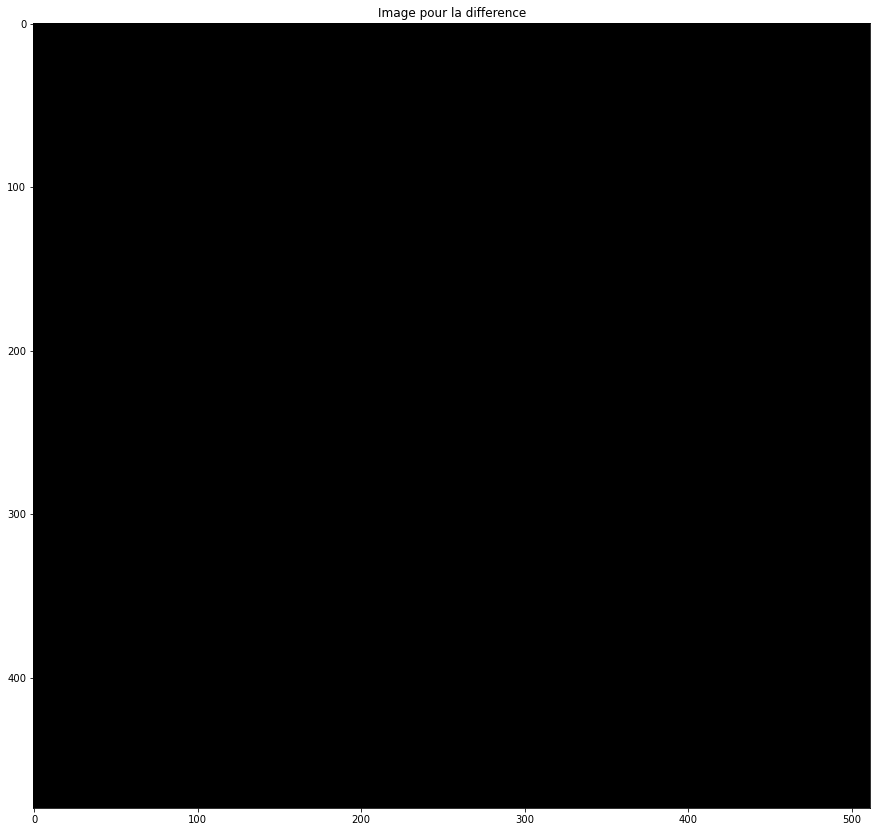

In [17]:
fig=plt.figure(figsize=(15, 15))
mat_diff = Heg - equ_img
mat_diff_CV = np.uint8(mat_diff)
plt.imshow(mat_diff_CV, cmap = "gray")
plt.title('Image pour la difference')
plt.show()

### Egalisation de chaque composante seule :

Il faut d'abord lire l'image et puis l'intervertir (avoir RGB), et puis utliser "cv.split" pour avoir chaque canal seul :

In [18]:
flower_img = cv.imread('flower.bmp')
img_rev = cv.cvtColor(flower_img,cv.COLOR_BGR2RGB)
canaux = cv.split(img_rev)

In [19]:
red_canal = canaux[0][:][:]
green_canal = canaux[1][:][:]
blue_canal = canaux[2][:][:]

### Affichage de l'image correspondante a chaque canal :

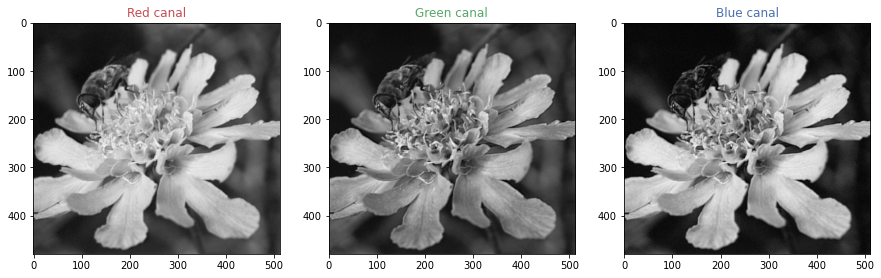

In [20]:
fig=plt.figure(figsize=(15, 15))
sns.reset_orig()

fig.add_subplot(1,3,1)
plt.imshow(red_canal, cmap = "gray")
plt.title('Red canal', color = 'r')

fig.add_subplot(1,3,2)
plt.imshow(green_canal, cmap = "gray")
plt.title('Green canal', color = 'g')

fig.add_subplot(1,3,3)
plt.imshow(blue_canal, cmap = "gray")
plt.title('Blue canal', color = 'b')
plt.show()

Egalisation de chaque canal :

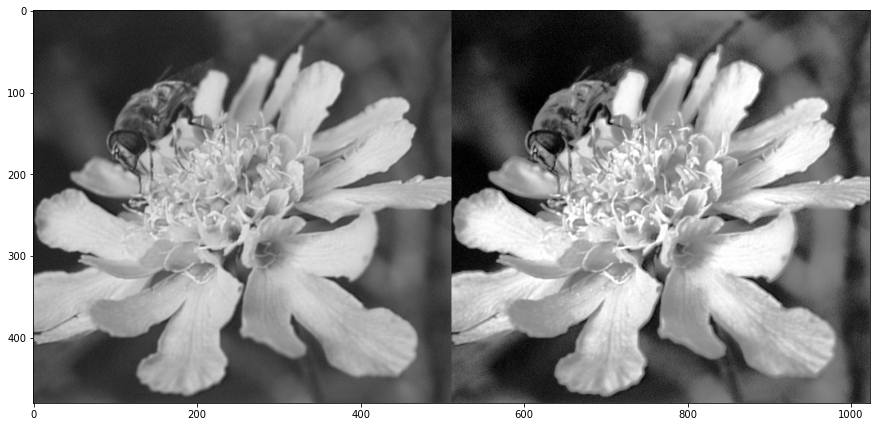

In [21]:
#Commencons par le canal rouge :
sns.reset_orig()
fig=plt.figure(figsize=(15, 15))
equ_r = cv.equalizeHist(red_canal)
res_r = np.hstack((red_canal, equ_r))
plt.imshow(res_r, cmap = "gray")
plt.show()

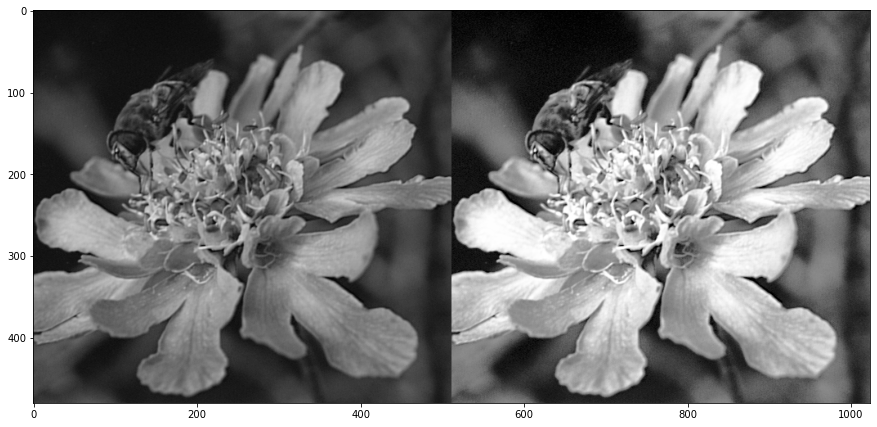

In [22]:
# le canal vert
fig=plt.figure(figsize=(15, 15))
equ_g = cv.equalizeHist(green_canal)
res_g = np.hstack((green_canal, equ_g))
plt.imshow(res_g, cmap = "gray")
plt.show()

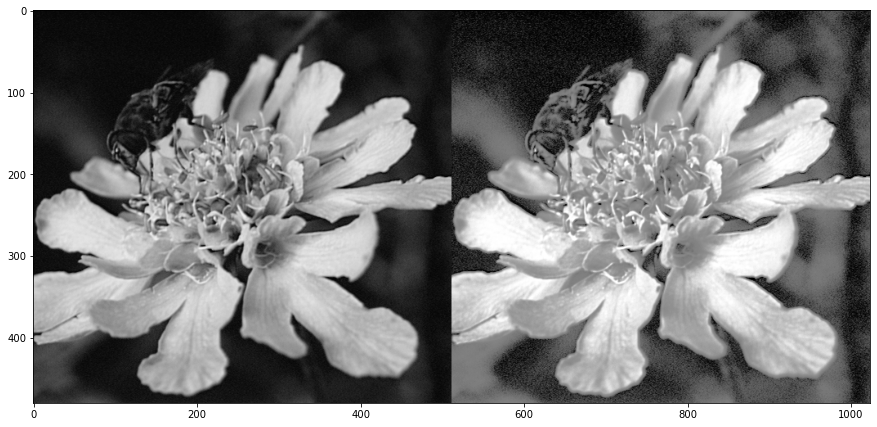

In [23]:
# le canal bleu :
fig=plt.figure(figsize=(15, 15))
equ_b = cv.equalizeHist(blue_canal)
res_b = np.hstack((blue_canal, equ_b))
plt.imshow(res_b, cmap = "gray")
plt.show()

## Concatenation des 3 canaux apres egalisation : 

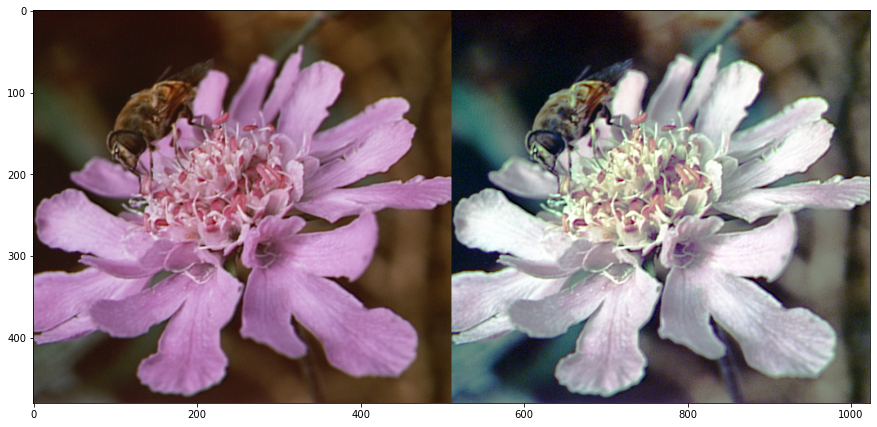

In [24]:
fig=plt.figure(figsize=(15, 15))
RGB = np.dstack((res_r, res_g, res_b))
RGB_CV = np.uint8(RGB)
plt.imshow(RGB_CV)
plt.show()

In [25]:
RGB_norm = cv.calcHist([RGB], [0],None,[256],[0,256]) / (RGB.shape[0] * RGB.shape[1])
entropie = 0
for i in range(len(RGB_norm)):
    if RGB_norm[i] != 0:
        entropie+= -RGB_norm[i] * np.log2(RGB_norm[i])
display("Entropie apres egalisation de chaque canal seul :", entropie[0])


'Entropie apres egalisation de chaque canal seul :'

7.729441829168201

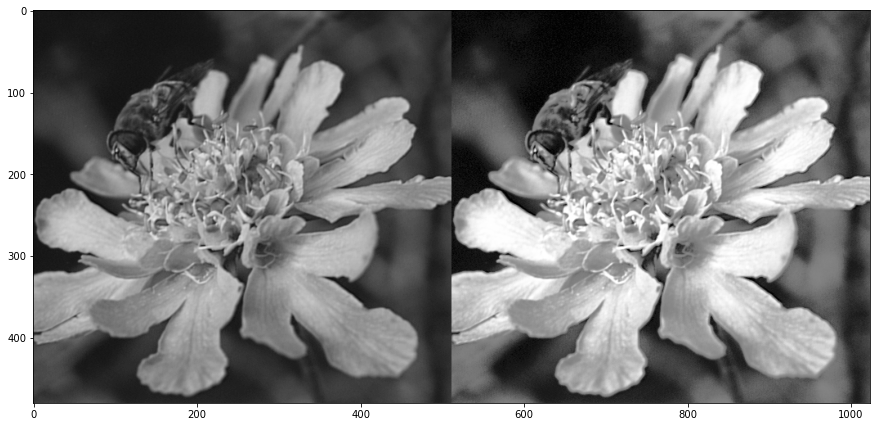

In [26]:
#on effectue un appel de nouveau pour l'image originale en couleur et puis l'egaliser 
img = cv.imread('flower.bmp', 0)
equ = cv.equalizeHist(img)
res = np.hstack((img, equ))
fig=plt.figure(figsize=(15, 15))
plt.imshow(res, cmap = "gray")
plt.show()

In [27]:
#egalisation du canal rouge par rapport au Hnc
for i in range(img_rev.shape[0]):
    for j in range(img_rev.shape[1]):
        red_canal[i][j] = round(255*histNormCum[red_canal[i][j]])

In [28]:
#egalisation du canal bleu par rapport au Hnc
for i in range(img_rev.shape[0]):
    for j in range(img_rev.shape[1]):
        blue_canal[i][j] = round(255*histNormCum[blue_canal[i][j]])

In [29]:
#egalisation du canal vert par rapport au Hnc
for i in range(img_rev.shape[0]):
    for j in range(img_rev.shape[1]):
        green_canal[i][j] = round(255*histNormCum[green_canal[i][j]])

In [30]:
# Concatenation des 3 canaux 
RGB_eg = np.dstack((red_canal, green_canal, blue_canal))

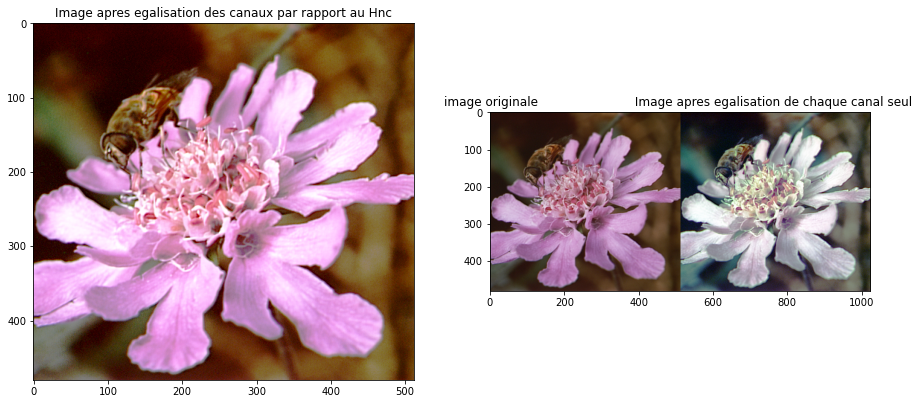

In [31]:
RGB_eg_CV = np.uint8(RGB_eg)

fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.title("Image apres egalisation des canaux par rapport au Hnc")
plt.imshow(RGB_eg_CV)

fig.add_subplot(1,2,2)
plt.title("image originale                         Image apres egalisation de chaque canal seul ")
plt.imshow(RGB_CV)
plt.show()

Calcul d'entropie :

In [32]:
RGB_eg_norm = cv.calcHist([RGB_eg], [0],None,[256],[0,256]) / (RGB_eg.shape[0] * RGB_eg.shape[1])
entropie_eg = 0
for i in range(len(RGB_eg_norm)):
    if RGB_eg_norm[i] != 0:
        entropie_eg+= -RGB_eg_norm[i] * np.log2(RGB_eg_norm[i])
display("Entropie apres egalisation de chaque canal par rapport Hnc :", entropie_eg[0])

'Entropie apres egalisation de chaque canal par rapport Hnc :'

6.912463053944947

## Commentaires et conclusion :

- L'image obtenue apres une egalisation de chaque composante seule n'est pas vraiment vive, les couleurs sont de faible intensite. Par contre l'image obtenue apres egalisation de chaque composante par rapport a l'histogramme cumule normalise, on a des couleurs vives avec une grande intensite --> image plaisente.
- Pour les entropies, on a une inversion, l'entropie mesure l'information qu'on peut avoir d'une image. Elle est inferieure dans le cas de l'image obtenue apres egalisation de chaque composante par rapport a l'histogramme cumule normalise a cause des trous dans l'histogramme.
- Pour les histogrammes, celui de l'image obtenue apres egalisation de chaque composante par rapport a l'histogramme cumule normalise sera plus plate que dans le cas de L'image obtenue apres une egalisation dde chaque composante


## Lecture et visualisation de l’image:
On va aussi effectuer une egalisation:

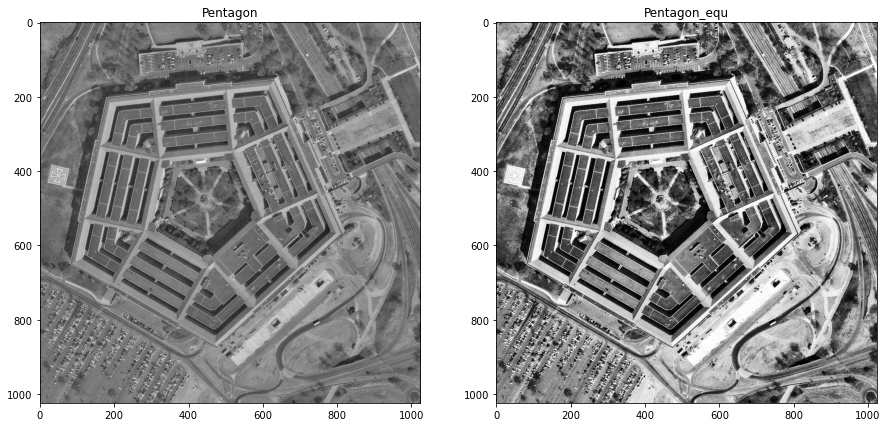

In [33]:
pentagon = cv.imread('pentagon.tif', 0)

pentagon_equ = cv.equalizeHist(pentagon)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.imshow(pentagon, cmap = "gray")
plt.title('Pentagon')

fig.add_subplot(1,2,2)
plt.imshow(pentagon_equ, cmap = "gray")
plt.title('Pentagon_equ')
plt.show()

## Commentaires :
On remarque qu'on a pu améliorer le contraste (on a effectuer une bonne egalisation : histogramme plate plus en plus).On peut bien differencier entre entre les zones claires et foncees.

## Histogram matching:

### Importation et affichage des images :

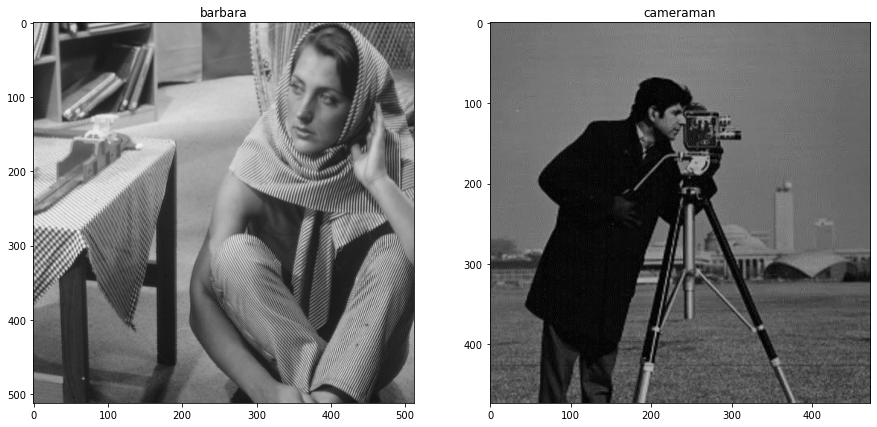

In [34]:
barbara = cv.imread('barbara.png')
cameraman = cv.imread('cameraman.jpg')
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.imshow(barbara, cmap = "gray")
plt.title('barbara')

fig.add_subplot(1,2,2)
plt.imshow(cameraman, cmap = "gray")
plt.title('cameraman')
plt.show()

In [35]:
#Histogram matching
cameraman_matched = match_histograms(cameraman, barbara, multichannel=True)

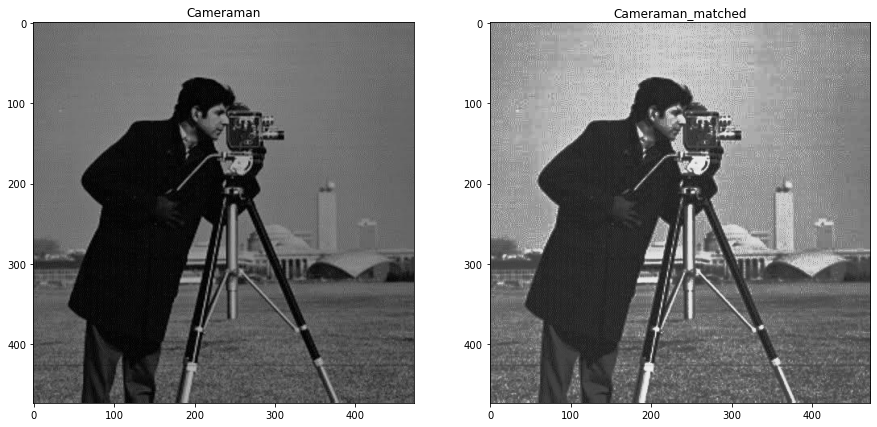

In [36]:
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.imshow(cameraman, cmap = "gray")
plt.title('Cameraman')

fig.add_subplot(1,2,2)
plt.imshow(cameraman_matched, cmap = "gray")
plt.title('Cameraman_matched')
plt.show()

## Commentaires et conclusions :
On remarque qu'on a pu améliorer le contraste apres ce matching.

# Manip2:

### Creation de A et B :

In [37]:
A = np.ones((256, 256))
for i in np.arange(90,121):
    for j in np.arange (90,181):
        A[i][j] = 0
sns.reset_orig()
A_CV = np.uint8(A)




In [38]:
B = np.ones((256, 256))
for i in np.arange(110,151):
    for j in np.arange (110,151):
        B[i][j] = 0
B_CV = np.uint8(B)



### Affichage de A et B :

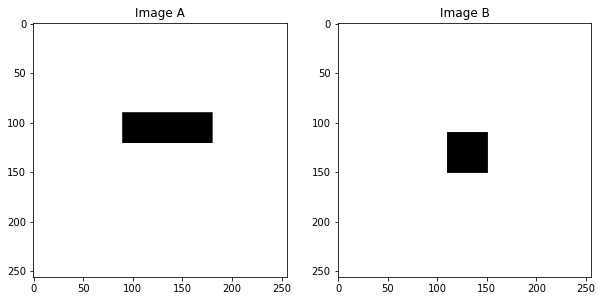

In [39]:
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,2,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(1,2,2)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")
plt.show()

### Les operations logiques :

on va commencer par la negation : a l'aide de la fonction "cv.bitwise_not", on aura alors :

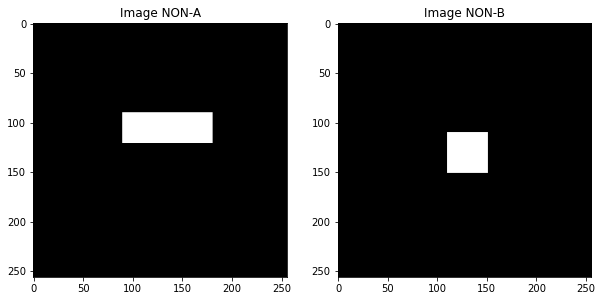

In [40]:
A_not = cv.bitwise_not(A_CV)
B_not = cv.bitwise_not(B_CV)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,2,1)
plt.title("Image NON-A")
plt.imshow(A_not, cmap = "gray")

fig.add_subplot(1,2,2)
plt.title("Image NON-B")
plt.imshow(B_not, cmap = "gray")
plt.show()

on passe a la conjonction (AND) : a l'aide de la fonction "cv.bitwise_and", on aura alors :

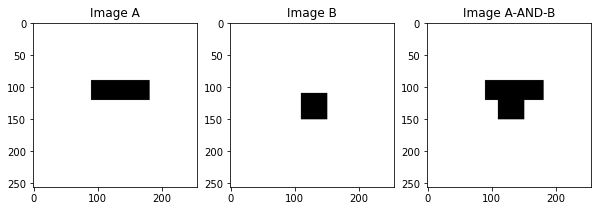

In [41]:
A_AND_B = cv.bitwise_and(A_CV, B_CV)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,3,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(1,3,2)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(1,3,3)
plt.title("Image A-AND-B")
plt.imshow(A_AND_B, cmap = "gray")
plt.show()

on passe a la disjonction (OR) : a l'aide de la fonction "cv.bitwise_or", on aura alors :

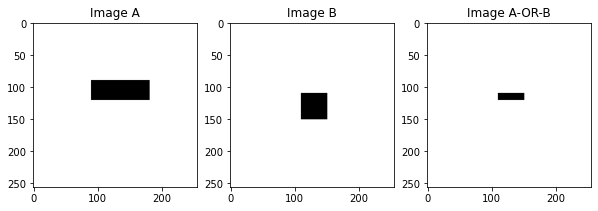

In [42]:
A_OR_B = cv.bitwise_or(A_CV, B_CV)
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,3,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(1,3,2)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(1,3,3)
plt.title("Image A-OR-B")
plt.imshow(A_OR_B, cmap = "gray")
plt.show()

on passe au ou exclusif (A XOR B ) : a l'aide de la fonction "cv.bitwise_xor", on aura alors :

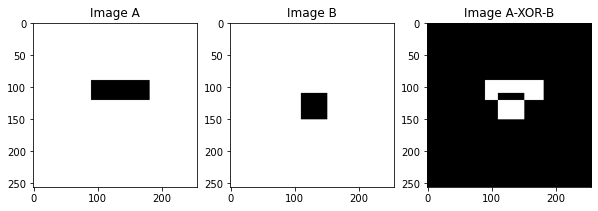

In [43]:
A_XOR_B = cv.bitwise_xor(A_CV, B_CV)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,3,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(1,3,2)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(1,3,3)
plt.title("Image A-XOR-B")
plt.imshow(A_XOR_B, cmap = "gray")
plt.show()

## Analyses et interpretation :
En general, on remarque qu'il y a une inversion dans le principe des operateurs logiques, cad :
- ET logique (AND) : il sera egal a 1 sauf dans le cas ou les 2 bits dans la meme position sont a 1, le AND est execute comme an OR et vice versa, quand on voit bien : pour le and, normalement la surface obtenue par l'intersection sera inferieure ou egale a celle du petit ensemble mais en vrai, elle est egale a la somme des 2 surfaces.
- OU logique (OR) : de meme, il sera egal a 0 sauf dans le cas ou les 2 bits dans la meme position sont a 0, on aura une surface plus grande, mais dans notre cas c'est l'inverse, il est execute comme un AND: on obtient l'intersection.
- OU exclusif (XOR) : il sera egal a 1 si les les 2 bits sont differents, on a une union exclusive(il garde sa logique).

### Generation des images Ai et Bi :

On peut les regenerer avec une boucle "for" ou bien utiliser la fonction "cv.bitwise_not" :

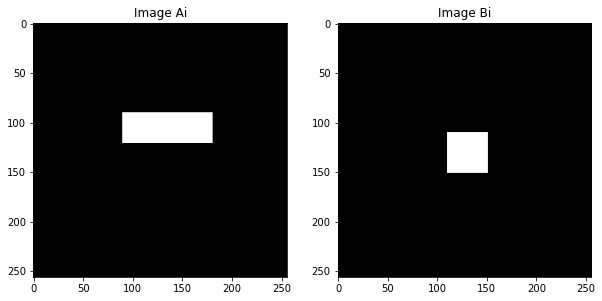

In [44]:
Ai = cv.bitwise_not(A_CV)
Bi = cv.bitwise_not(B_CV)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1,2,1)
plt.title("Image Ai")
plt.imshow(Ai, cmap = "gray")

fig.add_subplot(1,2,2)
plt.title("Image Bi")
plt.imshow(Bi, cmap = "gray")
plt.show()

### Comparaisons :

Dans cette partie, on va effectuer les memes operations logiques precedentes sur Ai et Bi, puis les comparer au operations logiques effectuees sur A et B : 

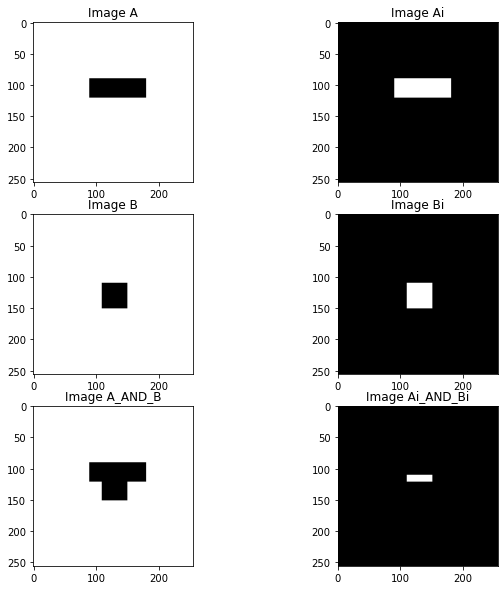

In [45]:
Ai_AND_Bi = cv.bitwise_and(Ai, Bi)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(3,2,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(3,2,3)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(3,2,5)
plt.title("Image A_AND_B")
plt.imshow(A_AND_B, cmap = "gray")

fig.add_subplot(3,2,2)
plt.title("Image Ai")
plt.imshow(Ai, cmap = "gray")

fig.add_subplot(3,2,4)
plt.title("Image Bi")
plt.imshow(Bi, cmap = "gray")

fig.add_subplot(3,2,6)
plt.title("Image Ai_AND_Bi")
plt.imshow(Ai_AND_Bi, cmap = "gray")

plt.show()


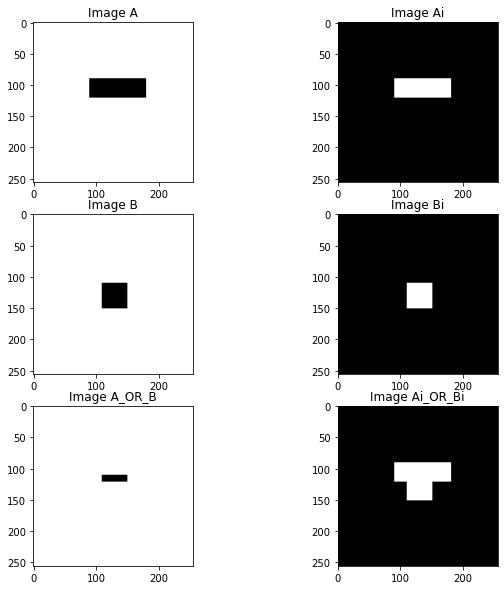

In [46]:
Ai_OR_Bi = cv.bitwise_or(Ai, Bi)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(3,2,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(3,2,3)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(3,2,5)
plt.title("Image A_OR_B")
plt.imshow(A_OR_B, cmap = "gray")

fig.add_subplot(3,2,2)
plt.title("Image Ai")
plt.imshow(Ai, cmap = "gray")

fig.add_subplot(3,2,4)
plt.title("Image Bi")
plt.imshow(Bi, cmap = "gray")

fig.add_subplot(3,2,6)
plt.title("Image Ai_OR_Bi")
plt.imshow(Ai_OR_Bi, cmap = "gray")

plt.show()

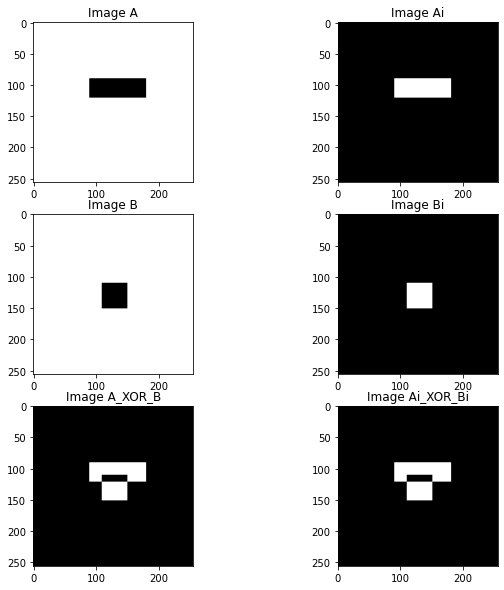

In [47]:
Ai_XOR_Bi = cv.bitwise_xor(Ai, Bi)

fig=plt.figure(figsize=(10, 10))
fig.add_subplot(3,2,1)
plt.title("Image A")
plt.imshow(A_CV, cmap = "gray")

fig.add_subplot(3,2,3)
plt.title("Image B")
plt.imshow(B_CV, cmap = "gray")

fig.add_subplot(3,2,5)
plt.title("Image A_XOR_B")
plt.imshow(A_XOR_B, cmap = "gray")

fig.add_subplot(3,2,2)
plt.title("Image Ai")
plt.imshow(Ai, cmap = "gray")

fig.add_subplot(3,2,4)
plt.title("Image Bi")
plt.imshow(Bi, cmap = "gray")

fig.add_subplot(3,2,6)
plt.title("Image Ai_XOR_Bi")
plt.imshow(Ai_XOR_Bi, cmap = "gray")

plt.show()

### Analyses et commentaires :

Dans cette partie(apres inversion des couleurs fond-formes), on a obtenu des resultats qui ne sont pas contradictoire avec le sens general des operateurs :
- ET logique (AND) représente l’intersection.
- OU logique (OR) représente l’union.
- OU exclusif (XOR) represente toujours la meme surface : une union exclusive.


## Conclusion :
Pour avoir une coherence entre ce qu'on voit et ce qui est vrai(la logique), il faut qu'on utilise un fond noir avoir des formes en blanc.

# Manip 03:

## Lecture et affichage de l'image :

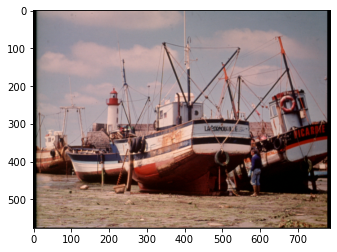

In [48]:
image_3 = Image.open('BoatsColor.bmp')
plt.imshow(image_3, cmap = "gray")
plt.show()

On va faire des operations geometriques selon les differentes methodes d'interpolation : 


## Translation :
On va demander a l'utilisateur d'entrer les parametres de l'operation a chaque fois :

In [49]:
t1 = input("entrez la valeur de t1 : translation suivant x : ")
t2 = input("entrez la valeur de t2 : translation suivant y : ")
print("t1 = ", t1)
print("t2 = ", t2)

entrez la valeur de t1 : translation suivant x : 35
entrez la valeur de t2 : translation suivant y : 10
t1 =  35
t2 =  10


On a 2 methodes pour se faire :
- Creer une matrice vide et puis la remplir avec les valeurs de la matrice apres translation cad decaler la position des valeurs.
- Utiliser la fonction predefinie.(on va continuer avec celle-ci).

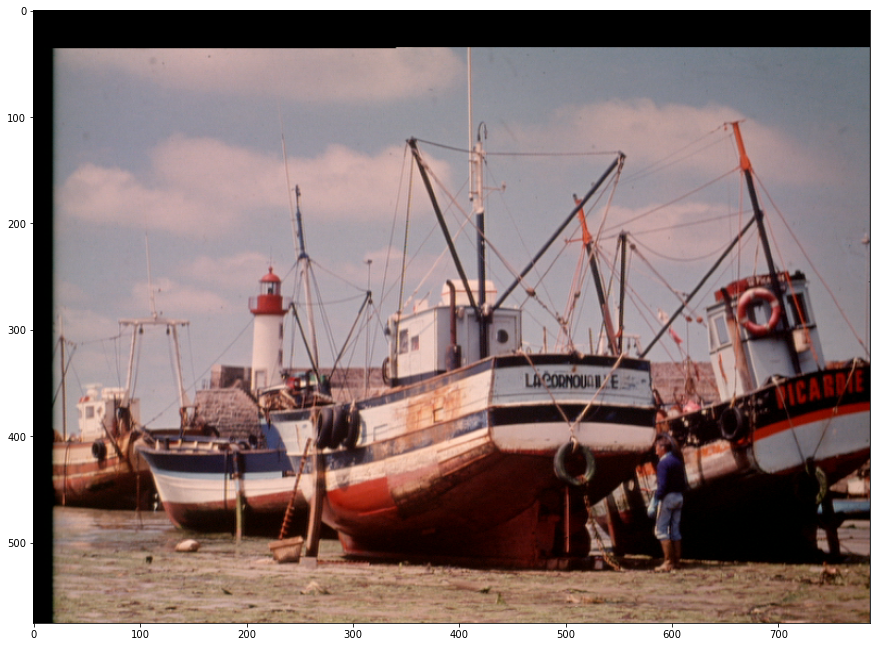

In [50]:
#Matrice de l'image:
image_3_mat = np.asarray(image_3)
#Matrice de l'image translatee :
mat_tr = np.zeros((image_3_mat.shape[0],image_3_mat.shape[1],image_3_mat.shape[2]))
for i in range(image_3_mat.shape[0]):
    for j in range(image_3_mat.shape[1]):
        if ((i+float(t1) <= (image_3_mat.shape[0]-1)) & (j+float(t2) <= (image_3_mat.shape[1]-1))):
            mat_tr[i+35][j+10][:] = image_3_mat[i][j][:]
        else : mat_tr[i][j][:] = mat_tr[i][j][:]
#Transformation matrice-image :
img_mat_tr = np.uint8(mat_tr)
fig=plt.figure(figsize=(15, 15))
plt.imshow(img_mat_tr)
plt.show()


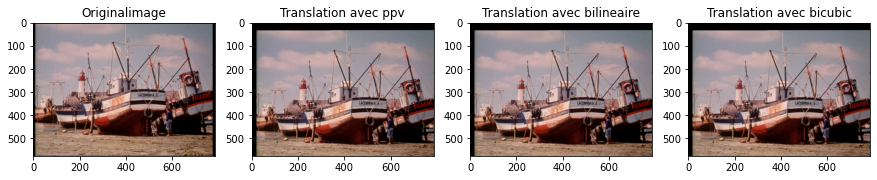

In [51]:
T = np.float32([[1, 0, t2], [0, 1, t1]])
#On utilise warpAffine pour la translation avec une interpolation plus proche voisin
img_translation_ppv = cv.warpAffine(image_3_mat, T, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_NEAREST)
#On utilise warpAffine pour la translation avec une interpolation bilineaire
img_translation_bilin = cv.warpAffine(image_3_mat, T, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_LINEAR)
#On utilise warpAffine pour la translation avec une interpolation bicubic
img_translation_bicubic = cv.warpAffine(image_3_mat, T, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_CUBIC)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,4,1)
plt.title("Originalimage")
plt.imshow(image_3_mat, cmap = "gray")

fig.add_subplot(1,4,2)
plt.title("Translation avec ppv")
plt.imshow(img_translation_ppv, cmap = "gray")

fig.add_subplot(1,4,3)
plt.title("Translation avec bilineaire")
plt.imshow(img_translation_bilin, cmap = "gray")

fig.add_subplot(1,4,4)
plt.title("Translation avec bicubic")
plt.imshow(img_translation_bicubic, cmap = "gray")

plt.show()
cv.destroyAllWindows()

## Scaling :

On va d'abord definir la matrice de redimensionnement : 

In [52]:
r1 = input("entrez la valeur de r1 : param de redimensionnement suivant x : ")
r2 = input("entrez la valeur de r2 : param de redimensionnement suivant y : ")

entrez la valeur de r1 : param de redimensionnement suivant x : 2
entrez la valeur de r2 : param de redimensionnement suivant y : 1.5


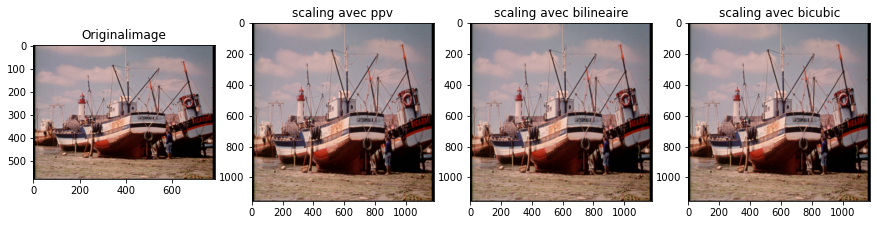

In [53]:
width = int(image_3_mat.shape[1] * float(r2))
height = int(image_3_mat.shape[0] * float(r1))
dsize = (width, height)
#On utilise resize pour scaling avec une interpolation plus proche voisin
image_3_sc_ppv = cv.resize(image_3_mat, dsize, "interpolation" == cv.INTER_NEAREST)
#On utilise resize pour scaling avec une interpolation bilineaire
image_3_sc_bilin = cv.resize(image_3_mat, dsize, "interpolation" == cv.INTER_LINEAR)
#On utilise resize pour scaling avec une interpolation bicubic
image_3_sc_bicubic = cv.resize(image_3_mat, dsize, "interpolation" == cv.INTER_CUBIC)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,4,1)
plt.title("Originalimage")
plt.imshow(image_3_mat, cmap = "gray")

fig.add_subplot(1,4,2)
plt.title("scaling avec ppv")
plt.imshow(image_3_sc_ppv, cmap = "gray")

fig.add_subplot(1,4,3)
plt.title("scaling avec bilineaire")
plt.imshow(image_3_sc_bilin, cmap = "gray")

fig.add_subplot(1,4,4)
plt.title("scaling avec bicubic")
plt.imshow(image_3_sc_bicubic, cmap = "gray")

plt.show()
cv.destroyAllWindows()

## Rotation :

In [54]:
teta = input("entrez la valeur de l'angle de rotation : ")
print("teta = ", teta)

entrez la valeur de l'angle de rotation : 60
teta =  60


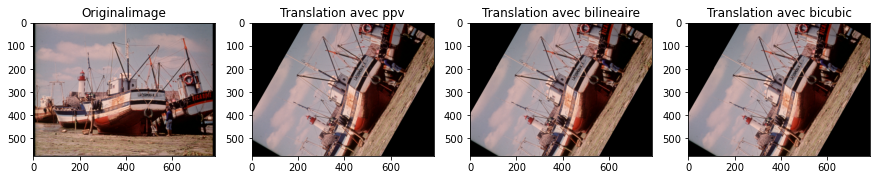

In [55]:
#Calcul du centre de l'image
(h, w) = image_3_mat.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
rot = cv.getRotationMatrix2D((cX, cY), float(teta), 1.0)
#On utilise waroAffine pour la translation avec une interpolation plus proche voisin
img_rot_ppv = cv.warpAffine(image_3_mat, rot, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_NEAREST)
#On utilise waroAffine pour la translation avec une interpolation bilineaire
img_rot_bilin = cv.warpAffine(image_3_mat, rot, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_LINEAR)
#On utilise waroAffine pour la translation avec une interpolation bicubic
img_rot_bicubic = cv.warpAffine(image_3_mat, rot, (image_3_mat.shape[1],image_3_mat.shape[0]), "interpolation" == cv.INTER_CUBIC)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,4,1)
plt.title("Originalimage")
plt.imshow(image_3_mat, cmap = "gray")

fig.add_subplot(1,4,2)
plt.title("Translation avec ppv")
plt.imshow(img_rot_ppv, cmap = "gray")

fig.add_subplot(1,4,3)
plt.title("Translation avec bilineaire")
plt.imshow(img_rot_bilin, cmap = "gray")

fig.add_subplot(1,4,4)
plt.title("Translation avec bicubic")
plt.imshow(img_rot_bicubic, cmap = "gray")

plt.show()

## Comparaisons :
Pour toutes les operations geometriques, le choix de la méthode d'interpolation peut également affecter le résultat final : (notes obtenues aussi avec des recherches):

- cv.INTER_NEAREST (interpolation par le plus proche voisin) : Cette méthode est la plus rapide et la plus simple des méthodes d'interpolation et peut être utilisée pour la translation d'images. Cependant, elle peut produire des images qui apparaissent pixélisées ou "en bloc" dans les zones qui ont été translatées.

- cv.INTER_LINEAR (interpolation bilinéaire) : Cette méthode est un meilleur choix pour la traduction d'images que l'interpolation du plus proche voisin, elle est plus rapide que l'interpolation bicubique et peut produire de bons résultats pour de nombreux types d'images.

- cv.INTER_CUBIC (interpolation bicubique) : Cette méthode est la méthode d'interpolation la plus sophistiquée et la plus coûteuse en calcul, elle est mieux utilisée pour les images qui nécessitent une translation lisse et précise, comme les images avec des gradients et des détails fins.